In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

## Data Preparation

In [2]:
#Load CSV file as DataFrame
crypto_df = pd.read_csv('Resources/crypto_data.csv')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
#Discard all cryptocurrencies that are not being traded
crypto_df = crypto_df[crypto_df['IsTrading']==True]
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
crypto_df = crypto_df.drop(columns='IsTrading')

In [5]:
#Remove all rows that have at least one null value
crypto_df.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [6]:
crypto_df = crypto_df.dropna()

In [7]:
#Check if null values were removed
crypto_df.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [8]:
#Filter for cryptocurrencies that have been mined
crypto_df = crypto_df[crypto_df['TotalCoinsMined']>0]
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [9]:
#List dataframe data types
crypto_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [10]:
#Delete the CoinName and Unnamed:0 from the original dataframe
crypto_df.drop(columns='CoinName', axis=1, inplace=True)
crypto_df

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [11]:
crypto_df.drop(columns='Unnamed: 0', axis=1, inplace=True)
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [13]:
crypto_df.shape

(532, 4)

In [14]:
#convert the remaining features with text values, Algorithm and ProofType, into numerical data
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X.shape

(532, 98)

When we convert both Algorithm and ProofType Data into numerical data, there is a great increase in the number of columns we're working with. We started with 4, and now we are working with 98 columns

In [17]:
#Standardize the dataset
scaler = StandardScaler()
scaled_crypto = scaler.fit_transform(X)

## Dimensionality Reduction

### PCA

In [18]:
#preserve 90% of the explained variance in dimensionality reduction
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(scaled_crypto)

In [21]:
#transform PCA data into dataframe
crypto_pca_df = pd.DataFrame(data=crypto_pca)
crypto_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-1.308850e-14,-1.266160e-11,2.080310e-14,-0.007129,-1.319756,-0.051813,...,3.459699e-15,2.014069e-15,2.658265e-16,9.165964e-16,1.972844e-15,5.998157e-15,2.236962e-15,3.089610e-15,2.866068e-15,1.583200e-15
1,-0.318434,1.032331,-0.591126,0.001386,-1.323705e-14,-1.255835e-11,2.069088e-14,-0.007739,-1.322514,-0.056674,...,4.477850e-15,1.257149e-15,8.754675e-18,1.248435e-16,3.144746e-15,7.501685e-15,2.309334e-15,4.933720e-15,1.800386e-15,1.004894e-15
2,2.305468,1.656383,-0.683617,0.004731,-2.972731e-14,-4.290588e-11,2.729459e-14,-0.054781,-1.542879,-0.943951,...,1.053780e-14,-3.990608e-14,2.300265e-14,7.314042e-14,-5.883687e-14,-6.653927e-14,-5.448342e-15,-6.098495e-14,6.982033e-15,-6.422078e-14
3,-0.145184,-1.320593,0.192813,-0.001229,7.739934e-15,1.113849e-11,-6.783813e-15,-0.002071,0.281463,0.251862,...,-2.430801e-16,-9.093636e-16,1.426626e-15,9.140362e-15,-1.190865e-14,-2.632450e-15,5.331215e-15,1.479103e-16,-4.780285e-15,-8.217000e-15
4,-0.151768,-2.036192,0.396182,-0.001705,1.629240e-14,1.545822e-11,-1.329989e-14,0.027735,0.519099,0.188820,...,-1.719534e-13,1.779051e-13,-2.645889e-15,-4.405292e-14,-4.455551e-15,1.512555e-14,1.207593e-13,-1.719674e-14,3.827912e-14,2.959987e-14


In [23]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

When we preserve 90% of the explained variance in dimensionality reduction, we reduce the number of columns to 74, rather than 98.In other words, with only 74 features, we preserve 90% of the original data. And according to the explained variance, each principal component contains between ~0.01-0.02% of the variance.

### t-SNE

In [24]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [25]:
# Reduce dimensions
tsne_features = tsne.fit_transform(crypto_pca_df)

In [26]:
#Check the number of columns
tsne_features.shape

(532, 2)

In [27]:
# Prepare to plot the dataset

# The first column of transformed features
crypto_pca_df['x'] = tsne_features[:,0]

# The second column of transformed features
crypto_pca_df['y'] = tsne_features[:,1]

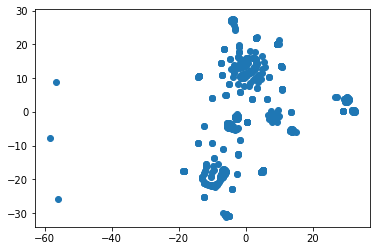

In [28]:
# Visualize the clusters
plt.scatter(crypto_pca_df['x'], crypto_pca_df['y'])
plt.show()

Based off the scatter plot visualized, the clusters of the features are not distinct, they are a little all over the place. By clustering with k-means, we will get a better insight on the matter.

## Cluster Analysis with k-means

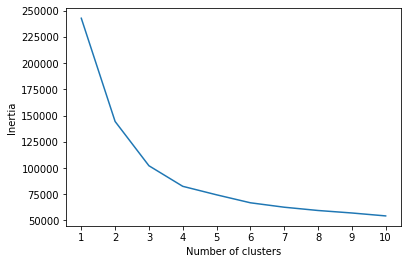

In [30]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Given the above graph, we can see a clear elbow happening at the x-value 4. This suggests that inertia slowly stabilizes once we have 4 clusters. 

## Recommendation

Based on the findings obtained, we can say that cryptocurrencies can be clustered into 4 distinct groups. 